In [14]:
import networkx as nx
import igraph
from lingpy.convert.graph import igraph2networkx
import json

In [28]:
clics = 'graphs/clics3' 
ref = 'Rzymski-2020'

In [16]:
%cd C:\Users\Mi\Desktop\HSE\COMPLEX\hw2\CLICKS

C:\Users\Mi\Desktop\HSE\COMPLEX\hw2\CLICKS


In [17]:
_G = igraph.read(clics+'.gml')
for node in _G.vs:
    node['name'] = node['label']
G = igraph2networkx(_G)

In [18]:
print(nx.info(G))
print(f'Number of connected components: {nx.number_connected_components(G)}')
print(f'Density: {nx.density(G)}')
print(f'Assortment coefficient: {nx.degree_pearson_correlation_coefficient(G)}')

Name: 
Type: Graph
Number of nodes: 2919
Number of edges: 4228
Average degree:   2.8969
Number of connected components: 1317
Density: 0.0009927630205636725
Assortment coefficient: 0.26400427903416257


In [19]:
langs = set()
for (node, data) in G.nodes.data():
    langs.update(data['Languages'].split(";"))

In [20]:
len(langs)

3248

In [21]:
categories = set()
fields = set()
for (n, data) in G.nodes.data():
    category = data['Category']
    field = data['Semanticfield']
    categories.add(category)
    fields.add(field)  

In [30]:
females = []
males = []
for (n, data) in G.nodes.data():
    gloss = data['Gloss'].lower()
    if 'female' in gloss:
        print(gloss)
        females.append(n)
    elif 'male' in gloss:
        print(gloss)
        males.append(n)

male (of person)
female (of person)
sow (female pig)
male pig
male dog
female dog
male person
female person
male
female (of animal)
male (of animal)
female
female yak


In [31]:
import pandas as pd

In [32]:
relations = pd.read_csv('https://raw.githubusercontent.com/concepticon/concepticon-data/master/concepticondata/conceptrelations.tsv', sep='\t')

In [33]:
relations.head()

,SOURCE,SOURCE_GLOSS,RELATION,TARGET,TARGET_GLOSS
0,822,HOW MANY,narrower,3450,HOW MANY PIECES
1,822,HOW MANY,narrower,531,HOW MUCH
2,1242,FEW,narrower,2924,A LITTLE
3,1242,FEW,narrower,3451,FEW PIECES
4,1198,MANY,narrower,3453,MANY PIECES


In [34]:
targets_f = []
for node in females:
    concepticonid = G.nodes().data('ConcepticonId')[node]
    if any(relations.SOURCE == int(concepticonid)):
        if any(relations[relations.SOURCE == int(concepticonid)].RELATION == 'narrower'):
            target = relations[relations.SOURCE == int(concepticonid)].TARGET
            targets_f.extend(target.tolist())
            for t in target.tolist():
                print(G.nodes().data()[node]['Gloss'], '\t', G.nodes().data()[str(t)]['Gloss'])
                target2 = relations[relations.SOURCE == int(t)].TARGET.tolist()
                targets_f.extend(target2)
                for t2 in target2:
                    if str(t2) in G.nodes():
                        print("\t", G.nodes().data()[str(t)]['Gloss'], '\t', G.nodes().data()[str(t2)]['Gloss'])
                        target3 = relations[relations.SOURCE == int(t2)].TARGET.tolist()
                        targets_f.extend(target3)
                        for t3 in target3:
                            if str(t3) in G.nodes():
                                print("\t\t",G.nodes().data()[str(t2)]['Gloss'], '\t', G.nodes().data()[str(t3)]['Gloss'])
                            else:
                                print(relations[relations.TARGET == t3].TARGET_GLOSS.tolist(), 'not in G')
                    else:
                        print(relations[relations.TARGET == t2].TARGET_GLOSS.tolist(), 'not in G')

FEMALE PERSON 	 WOMAN
['LADY'] not in G
	 WOMAN 	 OLD WOMAN
	 WOMAN 	 YOUNG WOMAN
['WHITE WOMAN'] not in G
['BLACK WOMAN'] not in G
FEMALE 	 FEMALE (OF ANIMAL)
FEMALE 	 FEMALE (OF PERSON)


In [35]:
all_fem = set([str(t) for t in targets_f]) | set(females)

In [36]:
targets_m = []
for node in males:
    concepticonid = G.nodes().data('ConcepticonId')[node]
    if any(relations.SOURCE == int(concepticonid)):
        if any(relations[relations.SOURCE == int(concepticonid)].RELATION == 'narrower'):
            target = relations[relations.SOURCE == int(concepticonid)].TARGET
            targets_m.extend(target.tolist())
            for t in target.tolist():
                print(G.nodes().data()[node]['Gloss'], '\t', G.nodes().data()[str(t)]['Gloss'])
                target2 = relations[relations.SOURCE == int(t)].TARGET.tolist()
                targets_m.extend(target2)
                for t2 in target2:
                    if str(t2) in G.nodes():
                        print("\t",G.nodes().data()[str(t)]['Gloss'], '\t', G.nodes().data()[str(t2)]['Gloss'])
                        target3 = relations[relations.SOURCE == int(t2)].TARGET.tolist()
                        targets_m.extend(target3)
                        for t3 in target3:
                            if str(t3) in G.nodes():
                                print("\t\t",G.nodes().data()[str(t2)]['Gloss'], '\t', G.nodes().data()[str(t3)]['Gloss'])
                            else:
                                print(relations[relations.TARGET == t3].TARGET_GLOSS.tolist(), 'not in G')
                    else:
                        print(relations[relations.TARGET == t2].TARGET_GLOSS.tolist(), 'not in G')

MALE PERSON 	 MAN
	 MAN 	 OLD MAN
	 MAN 	 YOUNG MAN
	 MAN 	 WHITE MAN
['BLACK MAN'] not in G
MALE 	 MALE (OF PERSON)
MALE 	 MALE (OF ANIMAL)


In [37]:
all_mal = set([str(t) for t in targets_m]) | set(males)

In [38]:
female_list = set()
for edge in G.edges(all_fem):
    print(G.nodes()[edge[0]]['Gloss'], G.nodes()[edge[1]]['Gloss'])
    female_list.add(edge[0])
    female_list.add(edge[1])

YOUNG WOMAN YOUNG
YOUNG WOMAN FEMALE (OF PERSON)
YOUNG WOMAN GIRL
YOUNG WOMAN DAUGHTER
YOUNG WOMAN WOMAN
YOUNG WOMAN YOUNG MAN
OLD WOMAN OLD
OLD WOMAN WIFE
OLD WOMAN GRANDMOTHER
OLD WOMAN WOMAN
OLD WOMAN MOTHER
OLD WOMAN OLD MAN
FEMALE (OF PERSON) FEMALE (OF ANIMAL)
FEMALE (OF PERSON) WOMAN
FEMALE (OF PERSON) WIFE
FEMALE (OF PERSON) MARRIED WOMAN
FEMALE (OF PERSON) MOTHER
FEMALE (OF PERSON) DAUGHTER
FEMALE (OF ANIMAL) WIFE
FEMALE (OF ANIMAL) WOMAN
FEMALE (OF ANIMAL) MOTHER
SOW (FEMALE PIG) BOAR
SOW (FEMALE PIG) PIG
WOMAN LIE DOWN
WOMAN PERSON
WOMAN GIRL
WOMAN WIFE
WOMAN DAUGHTER
WOMAN SUN
WOMAN WATER
WOMAN MOTHER
WOMAN MARRIED WOMAN
WOMAN FEMALE PERSON


In [43]:
lemmas = set()
for node in male_list:
    lemmas.update(G.nodes()[node]['Words'].split(";"))
len(lemmas)

26798

In [39]:
male_list = set()
for edge in G.edges(all_mal):
    print(G.nodes()[edge[0]]['Gloss'], G.nodes()[edge[1]]['Gloss'])
    male_list.add(edge[0])
    male_list.add(edge[1])

MALE PERSON
MALE HUSBAND
MALE MAN
MALE (OF PERSON) BRAVE
MALE (OF PERSON) PERSON
MALE (OF PERSON) MALE (OF ANIMAL)
MALE (OF PERSON) HUSBAND
MALE (OF PERSON) MAN
MALE (OF PERSON) FATHER
MALE (OF PERSON) YOUNG MAN
MALE (OF PERSON) PENIS
MALE (OF PERSON) BOY
MALE (OF PERSON) MARRIED MAN
YOUNG MAN YOUNG
YOUNG MAN SON
YOUNG MAN CHILD (DESCENDANT)
YOUNG MAN BOY
YOUNG MAN YOUNG WOMAN
MAN PEOPLE
MAN PERSON
MAN HUSBAND
MAN SON
MAN FATHER
MAN FREEMAN
MAN OLD MAN
MAN MARRIED MAN
MAN MALE (OF ANIMAL)
MAN BOY
OLD MAN OLD
OLD MAN HUSBAND
OLD MAN ANCESTORS
OLD MAN GRANDFATHER
OLD MAN OLD WOMAN
OLD MAN FATHER-IN-LAW (OF WOMAN)
MALE (OF ANIMAL) BRAVE
MALE (OF ANIMAL) HUSBAND
MALE (OF ANIMAL) FATHER
MALE (OF ANIMAL) BULL


In [112]:
with open("clics_synsets_female.txt", 'w') as f:
    for hyp in female_list:
        f.write(G.nodes()[hyp]['Gloss'] + "\n")

with open("clics_synsets_male.txt", 'w') as f:
    for hyp in male_list:
        f.write(G.nodes()[hyp]['Gloss'] + "\n")

In [22]:
female_list & male_list

{'1207', '1229', '406', '683', '76', '77', '907'}

In [46]:
import matplotlib.pyplot as plt 

In [105]:
nodes = list(female_list & male_list)
nodes.pop(-1)
colors = ['#F0C0C0' if n not in all_mal else '#C6DBE8' for n in nodes]
labels = {n:G.nodes().data('Gloss')[n] for n in nodes}
pos = {}
colors = []
mn=0
fn=0
nn = 0.5
for node in nodes:
    if node in all_mal:
        colors.append('#C6DBE8')
        pos[node] = [-1,mn]
        mn +=1
    elif node in all_fem:
        colors.append('#F0C0C0')
        pos[node] = [1,fn]
        fn +=1
    else:
        pos[node] = [0,nn]
        nn +=1
        colors.append('#DCDCDC')

edges = []
edge_labels = {}
for l,r, data in list(G.edges(nodes, data=True)):
    if l in nodes and r in nodes:
        edges.append((l,r))
        edge_labels[(l,r)] = data['LanguageWeight']
        
weights = [G[u][v]['LanguageWeight']*0.1 for u,v in edges]

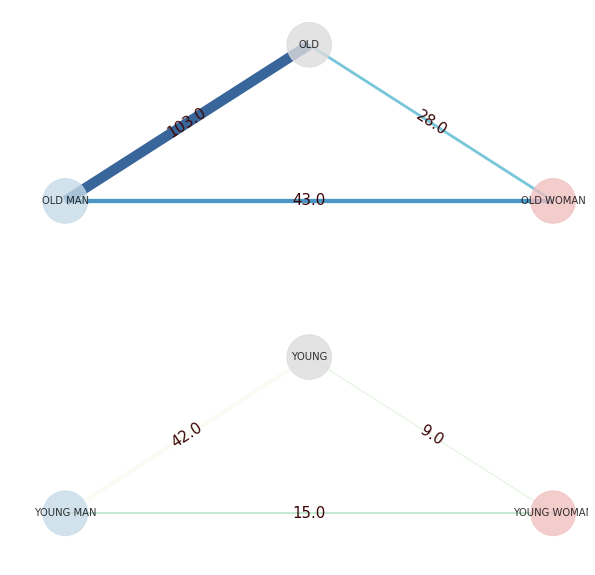

In [106]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G, nodelist=nodes, edgelist=edges, pos=pos,
                with_labels=True, labels=labels, node_color=colors, width=weights, node_size=2000,
                edge_color=range(len(edges)), alpha=0.8, edge_cmap=plt.cm.GnBu, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='#3C0505', bbox=dict(alpha=0), font_size=15)
plt.axis('off') 
plt.savefig('CLICSColexificationGender.png')

In [125]:
nodes = list(female_list)
colors = '#F0C0C0'
labels = {n:G.nodes().data('Gloss')[n] for n in nodes}

edges = []
edge_labels = {}
for l,r, data in list(G.edges(nodes, data=True)):
    if l in nodes and r in nodes:
        edges.append((l,r))
        edge_labels[(l,r)] = data['LanguageWeight']
        
weights = [G[u][v]['LanguageWeight']*0.1 for u,v in edges]

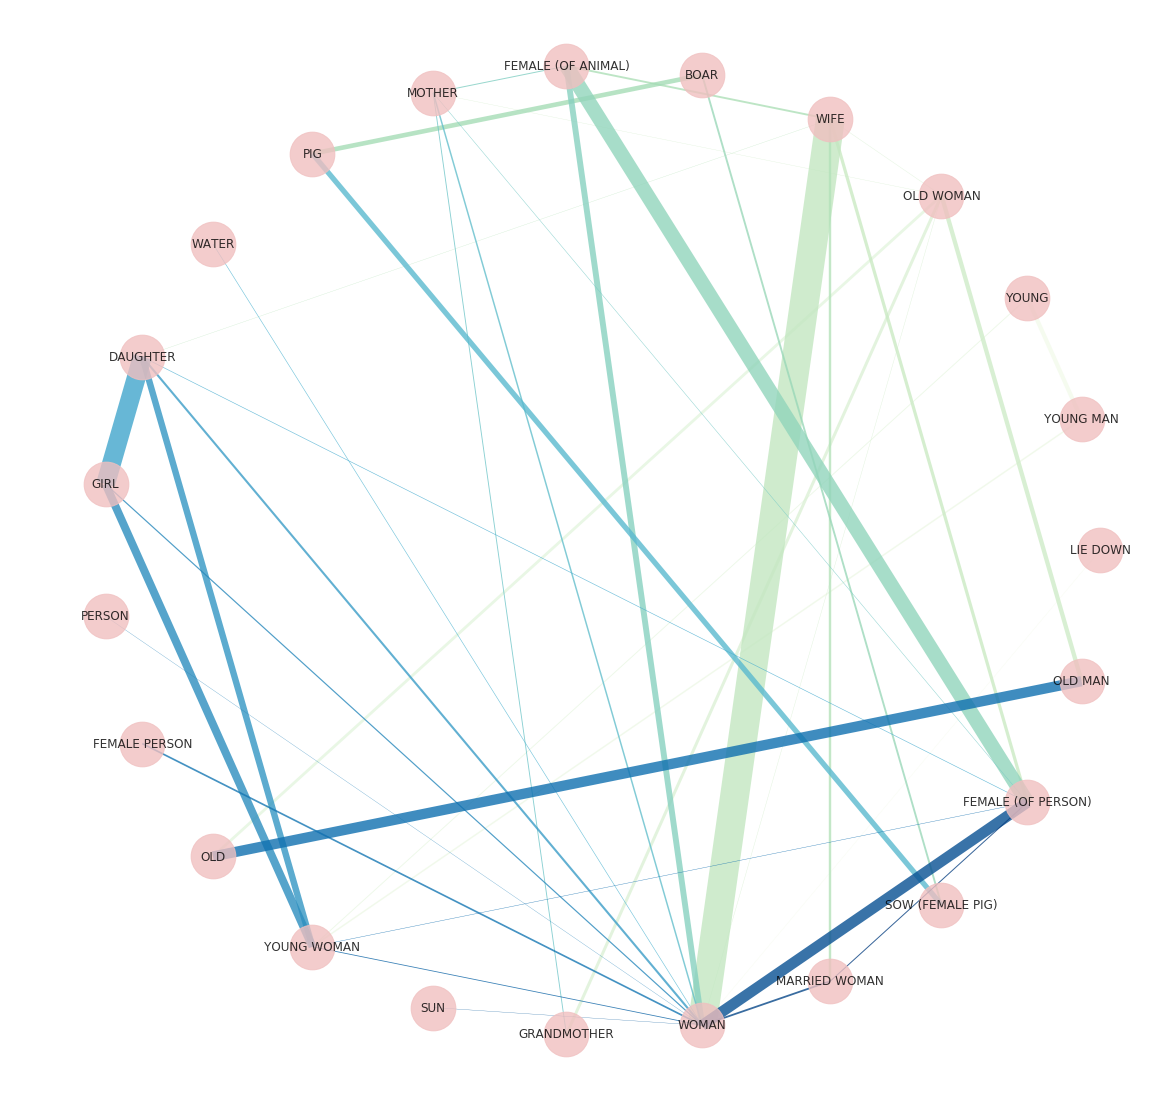

In [126]:
# pos = nx.shell_layout(nodes)
pos = nx.circular_layout(nodes)
# pos = nx.spring_layout(nodes)
# pos = nx.bipartite_layout(G, list(female_list))

plt.figure(figsize=(20,20))
nx.draw_networkx(G, nodelist=nodes, edgelist=edges, pos=pos,
                with_labels=True, labels=labels, node_color=colors, width=weights, node_size=2000,
                edge_color=range(len(edges)), alpha=0.8, edge_cmap=plt.cm.GnBu)
plt.axis('off') 
plt.savefig('CLICSColexificationGender_female.png')

In [127]:
nodes = list(male_list)
colors = '#C6DBE8'
labels = {n:G.nodes().data('Gloss')[n] for n in nodes}

edges = []
edge_labels = {}
for l,r, data in list(G.edges(nodes, data=True)):
    if l in nodes and r in nodes:
        edges.append((l,r))
        edge_labels[(l,r)] = data['LanguageWeight']

weights = [G[u][v]['LanguageWeight']*0.1 for u,v in edges]

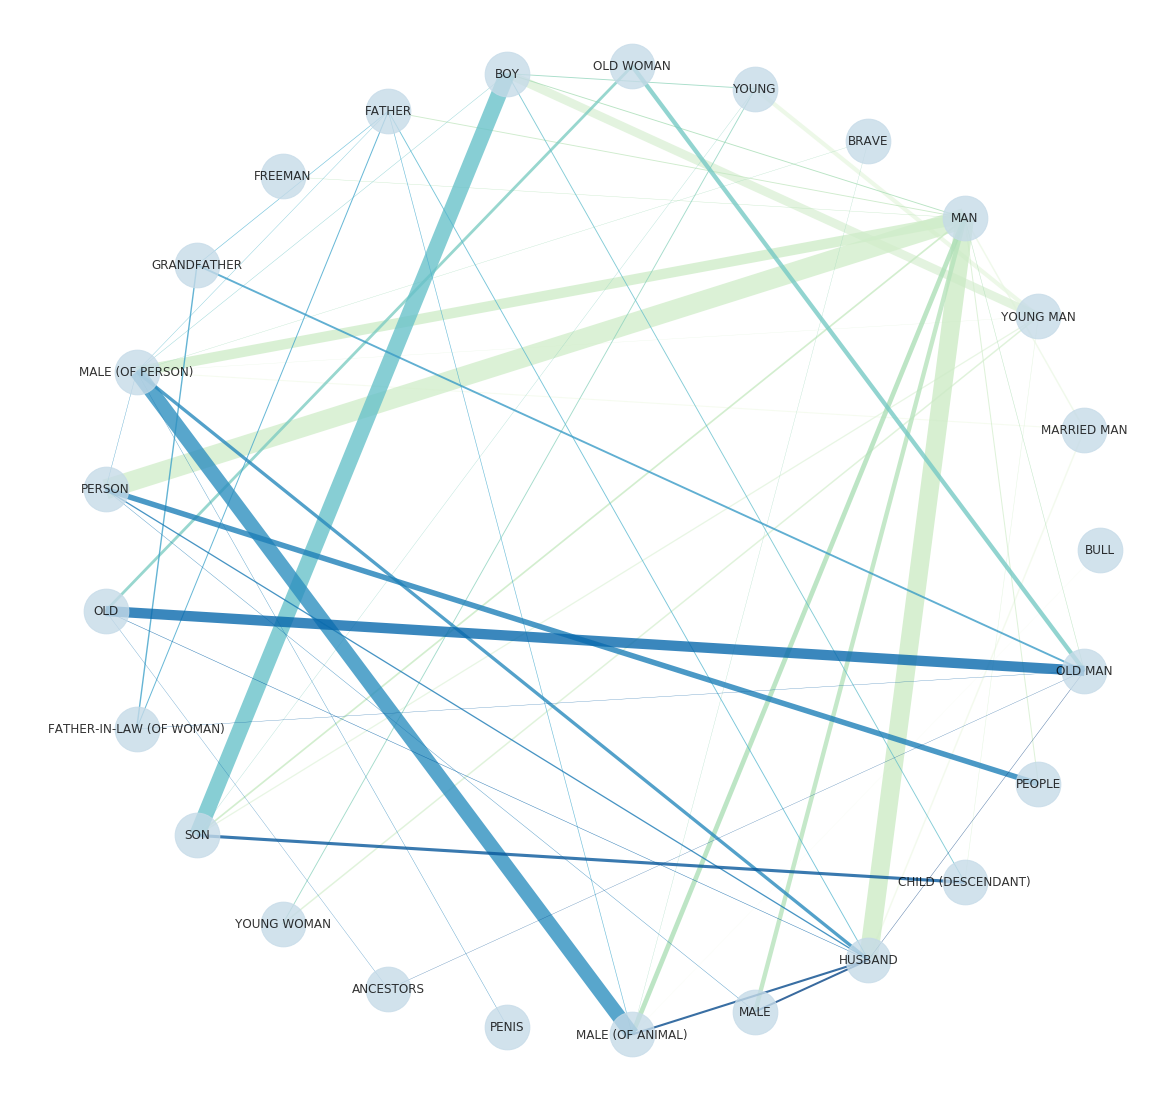

In [128]:
# pos = nx.shell_layout(nodes)
pos = nx.circular_layout(nodes)
# pos = nx.spring_layout(nodes)
# pos = nx.bipartite_layout(G, list(female_list))

plt.figure(figsize=(20,20))
nx.draw_networkx(G, nodelist=nodes, edgelist=edges, pos=pos,
                with_labels=True, labels=labels, node_color=colors, width=weights, node_size=2000,
                edge_color=range(len(edges)), alpha=0.8, edge_cmap=plt.cm.GnBu)
plt.axis('off') 
plt.savefig('CLICSColexificationGender_male.png')